In [9]:
import fitsio
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data = fitsio.read("targets/mtl_dark_onepct.fits")

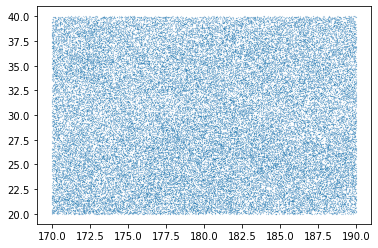

In [11]:
r = np.random.random(len(data))
rr = r<0.05
plt.scatter(data['RA'][rr], data['DEC'][rr],s=0.01)

In [18]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import fitsio
import desimodel.io
import desitarget.mtl
import desisim.quickcat
from astropy.io import fits
from astropy.table import Table, Column, vstack
import json
import shutil
import healpy
from desitarget.targetmask import desi_mask, obsconditions
from collections import Counter
import subprocess

def cut_tiles(tile_path="./", cut_name="one_pct", limits={}):
        # Create output directory
    os.makedirs(tile_path, exist_ok=True)
    
    tiles = Table(desimodel.io.load_tiles())
    ii_bright = tiles['PROGRAM'] == 'BRIGHT'
    
    
    min_ra = limits['min_ra'] 
    max_ra = limits['max_ra'] 
    min_dec = limits['min_dec'] 
    max_dec = limits['max_dec'] 
    
    cut_tilefile = os.path.join(tile_path, "tiles_{}_bright.fits".format(cut_name))
    ii = (tiles['RA']>(min_ra)) & (tiles['RA']<(max_ra)) & (tiles['DEC']<max_dec) & (tiles['DEC']>min_dec) 
    ii = ii & ii_bright
    tiles[ii].write(cut_tilefile, overwrite='True')
    print("Wrote tiles to {}".format(cut_tilefile))
    
    cut_tilefile = os.path.join(tile_path, "tiles_{}_dark.fits".format(cut_name))
    ii = (tiles['RA']>min_ra) & (tiles['RA']<max_ra) & (tiles['DEC']<max_dec) & (tiles['DEC']>min_dec)
    ii = ii & (~ii_bright)
    tiles[ii].write(cut_tilefile, overwrite='True')
    print("Wrote tiles to {}".format(cut_tilefile))

    return 

In [19]:
cut_tiles(tile_path='./tiles', limits={'min_ra':172, 'max_ra':188, 'min_dec':22, 'max_dec':38})

Wrote tiles to ./tiles/tiles_one_pct_bright.fits
Wrote tiles to ./tiles/tiles_one_pct_dark.fits


In [20]:
tiles = Table.read("tiles/tiles_one_pct_dark.fits")

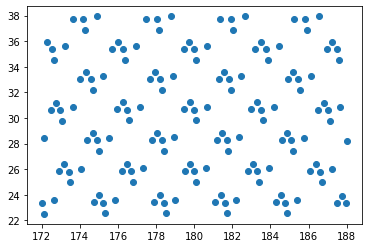

In [21]:
plt.scatter(tiles['RA'], tiles['DEC'])